In [1]:
!pip install rdkit-pypi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 56.2 MB/s eta 0:00:00


In [2]:
import os
!git clone https://github.com/TieuLongPhan/Database.git
os.chdir("/content/Database/Training_cheminformatics")

Cloning into 'Database'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 2), reused 15 (delta 1), pack-reused 0
Unpacking objects: 100% (19/19), 734.83 KiB | 3.14 MiB/s, done.


# **1. Neural networks**

## 1.1. What is a neural network?

Neural networks, also known as artificial neural networks (ANNs), are a subset of machine learning algorithms. The structure and the name of the neural network is inspired by the human brain, mimicking the way that biological neurons transfer signals to one another.

![Basic structure](https://drive.google.com/uc?id=1IVXDo0bv5xSoLKabVp0DB7zBUzRRG0aq)

**Figure 1**: The figure shows the basic structure of an artificial neural network. It is taken from the blogpost: "Designing Your Neural Networks", Lavanya Shukla




ANNs consist of three main layers as shown in the figure above: the _input layer_, some _hidden layers_ and the _output layer_. Let's take a deeper look at each of them.

1. **Input neurons or input layer**
   - This layer represents the number of features which are used to make the predictions.
   - The input vector needs one input neuron per feature.
2. **Hidden layers and neurons per hidden layer**
    - The dimension of the hidden layers may vary greatly, but a good rule of thumb is to have dimensions in the range of the input layer and the output layer.
    - In general, using the same number of neurons for all hidden layers will suffice but for some datasets, having a large first layer and following it up with smaller layers may lead to a better performance as first layers can learn many low-level features.
3. **Output neurons or output layer**
    - The output layer represents the value of interest, which will be predicted by the neural network.
        - Regression task: the value is a real number (or vector) such as the pIC50 value.
        - Binary classification task: the output neuron represents the probability of belonging to the positive class.
        - Multi-class classification task: there is one output neuron per class and the predictions represent the probability of belonging to each class. A certain activation function is applied on the output layer to ensure the final probabilities sum up to 1.

**Neurons** are the core units of a neural network. Let's look into the operations done by each neuron to understand the overall mechanism of a neural network.

![NN](https://drive.google.com/uc?id=1r0jnngCbtq6MUg-FEFYsctbAMhBx-PDo)

Figure 2: Operations done by a neuron. The figure is taken from the blogpost: "First neural network for beginners explained (with code)", Arthur Arnx

Each input neuron $x_i$ is multiplied by a weight $w_i$. In Figure 2, we have $(x1, x2, x3)$ and  $(w1, w2, w3)$. The value of a weight determines the influence that the input neuron will have on the neuron of the next layer. The multiplied values are then summed. An additional value, called bias, is also added and allows to shift the activation function. This new value becomes the value of the hidden neuron. Mathematically, we have:

$$ h = (w1*x1 + w2*x2 + w3*x3) + b = \sum_i ^ 3w_i*x_i+ b $$

An activation function, discussed in greater details in the next section, is then applied to the hidden neuron to determine if the neuronal value should be activated or not. An activated neuron transmits data to the neuron of the next layer. In this manner, the data is propagated through the network which is known as [forward propagation](https://en.wikipedia.org/wiki/Feedforward_neural_network).

The weights and biases in a neural network are referred to as _learnable parameters_. They are tuned when training the model to obtain a good performance.



## 1.2. Activation function

**What is an activation function?**

An [activation function](https://en.wikipedia.org/wiki/Activation_function) regulates the amount of information passed through a neural network. This function is applied to each neuron and determines whether the neuron should be activated or not. It works as a "gate" between the input feeding the current neuron and its output going to the next layer as shown in the figure below.

![Activation](https://drive.google.com/uc?id=169z8Wrl-Kju5DjzvJxQoUPmwtl8jOcrr)

*Figure 3:* The figure shows an activation function applied on a neuron. It is taken from the blogpost: [Activation Functions (Linear/Non-linear) in Deep Learning](https://xzz201920.medium.com/activation-functions-linear-non-linear-in-deep-learning-relu-sigmoid-softmax-swish-leaky-relu-a6333be712ea)

**Types of activation function**

There are many types of activation functions, but we only discuss the two which we use in the practical section below. For more information, see the supplementary section and references. Most neural networks use non-linear activation functions in the hidden layers to learn complex features and adapt to a variety of data.

1. Rectified Linear Unit (ReLU)

- It takes the form: $\boxed{f(x) = max\{ 0, x\}}$.
- As shown in the figure below, [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) outputs $x$, if $x$ is positive and $0$ otherwise. The range of ReLU is $[0, +\infty)$.
- One of the reasons it is commonly used is its sparsity: only few neurons will be activated and thereby making the activations sparse and efficient.
- It has become the default activation function for many types of neural networks because it makes the training of a model less expensive and the model often achieves better performance.
- A possible drawback of ReLU is the so-called _dying ReLU problem_ where neurons get stuck as inactive for all inputs, it is a form of [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

![ReLU](https://drive.google.com/uc?id=1QEHmk_wOrZu-511CYZQn_ycE9uMehYXF)

*Figure 4:* Representation of the *ReLU* function. Figure by Sakshi Misra.

2. Linear activation function

- A [linear activation function](https://keras.io/api/layers/core_layers/dense/) takes the form: $\boxed{a(x) = x}$.
- It is the most appropriate activation function in a regression setting, since there is no constraint on the output.

## 1.3. Loss function 


When training a neural network, the aim is to optimize the prediction error, i.e. the difference between the true value and the value predicted by the model. The prediction error can be written as a function, known as the objective function, cost function, or **loss function**. The goal is therefore to minimize the loss function, in other words, to find local minima. The loss function is one of the important components in training a neural network. For more details on loss functions, please refer to the blogpost: [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/).
Two commonly used loss functions in regression tasks are

1. the **Mean Squared Error (MSE)**: As the name suggests, this loss is calculated by taking the mean of the squared differences between the true and predicted values. 
2. the **Mean Absolute Error (MAE)**: The loss is calculated by taking the mean of the absolute difference between the true and predicted values.

## 1.4. Training a neural network

When starting with a neural network, the parameters, i.e. the weights and biases, are randomly initialized. The inputs are then fed into the network and produce an output. However, the corresponding output will most likely be very different from the true value. In other words, the prediction error will be very poor: the loss function is far from being minimal. Therefore, the initial parameters have to be optimized to obtain better predictions.

To this end, we need to minimize the loss function. An efficient way to find such a minimum is to use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.) algorithm. This optimization scheme is iterative and uses both the derivative of the loss function (or gradient in the multivariate case) and a learning rate. The main idea behind the algorithm is to follow the steepest direction of the function, obtained with the gradient and managing the length of each step with the learning rate. The latter is often referred to as a hyperparameter, which can be tuned using cross-validation (more details in future talktorials).

In training neural networks, it is very common to use _back-propagation_, which is a way of efficiently obtaining the gradients using the chain-rule for differentiation.

In summary, after each forward pass through a network, back-propagation performs a backward pass while adjusting the model’s parameters in order to minimize the loss function.

**Computation cost**

If the data set used is very large, computing the gradient of the loss function can be very expensive. A way to solve this issue is to use instead a sample, or mini-batch, of the training data at a time, known as [_Stochastic Gradient Descent (SGD)_](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) or _Mini-Batch Stochastic Gradient Descent_.

## 1.5. Keras workflow

[Keras](https://keras.io/getting_started/) is an open-source library for machine learning and more specifically neural networks. Its API runs on top of the very well-known [tensorflow](https://www.tensorflow.org/) deep learning platform.

Below, we present a common workflow for training a neural network with [keras](https://keras.io/getting_started/).

 
- **Prepare the data** − Foremost for any machine learning algorithm, we process, filter and select only the required information from the data. Then, the data is split into training and test data sets. The test data is used to evaluate the prediction of the algorithm and to cross check the efficiency of the learning process.

 
- **Define the model** - In keras, every ANN is represented by keras [models](https://keras.io/api/models/model/#model-class). Keras provides a way to create a model which is called [sequential](https://keras.io/api/models/sequential/). The layers are arranged sequentially where the data flows from one layer to another layer in a given order until the data finally reaches the output layer. Each layer in the ANN can be represented by a *keras layer*. 


- **Compile the model** − The compilation is the final step in creating a model. Once the compilation is done, we can move on to the training phase. A _loss function_ and an _optimizer_ are required in the learning phase to define the prediction error and to minimize it, respectively. In the practical part of this talktorial, we use the mean squared error as a loss and the [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer, which is a popular version of gradient descent and has shown to give good results in a wide range of problems.

- **Fit the model** - The actual learning process will be done in this phase using the training data set. We can call the [fit()](https://keras.io/api/models/model_training_apis/#fit-method) method which needs several parameters such as $x$ the input data, $y$ the target data, the batch size, the number of epochs, etc. An _epoch_ is when the entire dataset is passed forward and backward through the neural network once.

- **Evaluate model** − We can evaluate the model by looking at the loss function between the predicted and true values of the test data using the [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method.

    - Scatter plots are a common and simple approach to visualize the evaluation of a model. They plot the predicted vs. true values. If the fit was perfect, we should see the $y=x$ line, meaning that the predicted value is exactly the true value.
    
    
- **Predictions on external/unlabeled data** − We make predictions based on the trained model for the external data set using the [predict()](https://keras.io/api/models/model_training_apis/#predict-method) method.

## 1.6. Advantages and applications of neural networks

**Advantages of a neural network** 

- **Organic learning**: Neural networks have the ability to learn by extracting the important features present in the input data.
- **Non linear data processing**: They have the ability to learn and model non-linear and complex relationships. 
- **Time operation**: The computation cost during training time can be reduced using parallelization.

To learn more about advantages and disadvantages of a neural network, please refer to the article: J V Tu, "*Advantages and disadvantages of using artificial neural networks versus logistic regression for predicting medical outcomes*", [Journal of Clinical Epidemiology, **vol 49 issue 11**, pages: 1225-1231](https://pubmed.ncbi.nlm.nih.gov/8892489/).

**Applications of neural networks**

There are various applications of neural networks in computer-aided drug design  such as:

- Drug design and discovery
- Biomarker identification and/or classification
- Various types of cancer detection
- Pattern recognition

Please refer to the article: Cheirdaris D.G. (2020), "*Artificial Neural Networks in Computer-Aided Drug Design: An Overview of Recent Advances*",  [GeNeDis 2018. Advances in Experimental Medicine and Biology, **vol 1194**. Springer](https://link.springer.com/chapter/10.1007/978-3-030-32622-7_10) for more details.

# **2. Practical**



## 2.1. Sequential
The first step is to import all the necessary libraries.

In [3]:
from pathlib import Path
from warnings import filterwarnings

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys, Draw
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

In [4]:
# Load data
df = pd.read_csv("CHEMBL25_activities_EGFR.csv", index_col=0)
df = df.reset_index(drop=True)

In [5]:
# Check the dimension and missing value of the data
print("Shape of dataframe : ", df.shape)
df.info()

Shape of dataframe :  (3906, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906 entries, 0 to 3905
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chembl_id         3906 non-null   object 
 1   IC50              3906 non-null   float64
 2   units             3906 non-null   object 
 3   canonical_smiles  3906 non-null   object 
 4   pIC50             3906 non-null   float64
dtypes: float64(2), object(3)
memory usage: 152.7+ KB


In [6]:
# Keep necessary columns
chembl_df = df[["canonical_smiles", "pIC50"]]
chembl_df.head()
# NBVAL_CHECK_OUTPUT

,canonical_smiles,pIC50
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000
3,Clc1c(OCc2cc(F)ccc2)ccc(Nc2ncnc3c2sc(C#C[C@H]2...,7.397940
4,S(Sc1n(C)c2c(c1C(=O)NCC(O)CO)cccc2)c1n(C)c2c(c...,4.366531


In [7]:
def smiles_to_fp(smiles, method="maccs", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.
    """

    # Convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        return np.array(GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits))
    if method == "morgan3":
        return np.array(GetMorganFingerprintAsBitVect(mol, 3, nBits=n_bits))
    else:
        print(f"Warning: Wrong method specified: {method}." " Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [8]:
chembl_df["fingerprints_df"] = chembl_df["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe:", chembl_df.shape)
chembl_df.head(3)
# NBVAL_CHECK_OUTPUT

Shape of dataframe: (3906, 3)


,canonical_smiles,pIC50,fingerprints_df
0,Clc1c(OCc2cc(F)ccc2)ccc(Nc2c(C#Cc3ncccn3)cncn2)c1,7.113509,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,ClCC(=O)OCCN1C(=O)Oc2c1cc1c(Nc3cc(Cl)c(F)cc3)n...,6.481486,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,FC(F)(F)c1cc(Nc2n(C(C)C)c3nc(Nc4ccc(N5CC[NH+](...,9.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [10]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    chembl_df["fingerprints_df"], chembl_df[["pIC50"]], test_size=0.2, random_state=42
)

# Print the shape of training and testing data
print("Shape of training data:", X_train.shape)
print("Shape of test data:", X_test.shape)
# NBVAL_CHECK_OUTPUT

Shape of training data: (3124,)
Shape of test data: (782,)


### 2.1.1. Define neural network

A keras model is defined by specifying the number of neurons in the hidden layers and the activation function as arguments. For our purpose, we define a model with *two hidden layers*. We use ReLU in the hidden layers and a linear function on the output layer, since the aim is to predict pIC50 values.
Finally, we compile the model using the *mean squared error* as a loss argument and *adam* as an optimizer.

In [11]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="linear", name="layer3"))

    # Compile model
    model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse", "mae"])
    return model

### 2.1.2. Train the model

#### 2.1.2.1. Train basic model

In [12]:
# Neural network parameters
batch_sizes = 16
nb_epoch = 50
layer1_size = 64
layer2_size = 32

model = neural_network_model(layer1_size, layer2_size)

In [14]:
history = model.fit(
        np.array(list((X_train))).astype(float),
        y_train.values,
        batch_size=batch_sizes,
        validation_data=(np.array(list((X_test))).astype(float), y_test.values),
        verbose=1, #modify to show
        epochs=nb_epoch,)

Epoch 1/50
196/196 [==============================] - 7s 7ms/step - loss: 4.7796 - mse: 4.7796 - mae: 1.5491 - val_loss: 1.7883 - val_mse: 1.7883 - val_mae: 1.0596
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.4834 - mse: 1.4834 - mae: 0.9531 - val_loss: 1.5330 - val_mse: 1.5330 - val_mae: 0.9827
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.3162 - mse: 1.3162 - mae: 0.9033 - val_loss: 1.4309 - val_mse: 1.4309 - val_mae: 0.9462
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.2459 - mse: 1.2459 - mae: 0.8784 - val_loss: 1.4238 - val_mse: 1.4238 - val_mae: 0.9390
Epoch 5/50
196/196 [==============================] - 1s 4ms/step - loss: 1.1222 - mse: 1.1222 - mae: 0.8263 - val_loss: 1.3582 - val_mse: 1.3582 - val_mae: 0.9178
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 1.0672 - mse: 1.0672 - mae: 0.8063 - val_loss: 1.3063 - val_mse: 1.3063 - val_mae: 0.9066
Epoch 7/50
196/1

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 64)                10752     
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 1)                 33        
                                                                 
Total params: 12,865
Trainable params: 12,865
Non-trainable params: 0
_________________________________________________________________


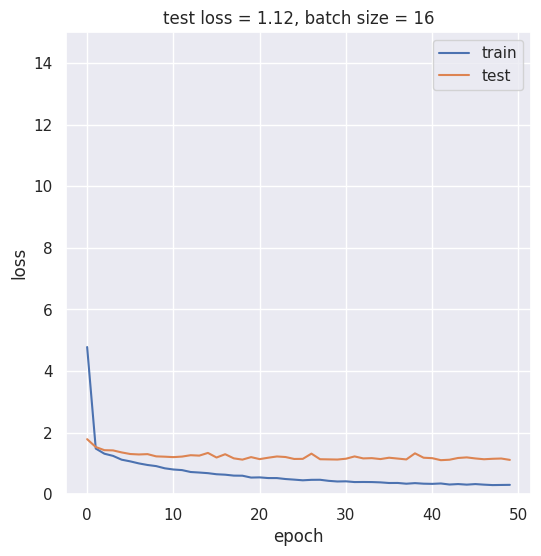

In [17]:
fig = plt.figure(figsize=(6, 6))
sns.set(color_codes=True)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="test")
plt.legend(["train", "test"], loc="upper right")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.ylim((0, 15))
plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch_sizes}"
    )
plt.show()

#### 2.1.2.2. Mini-batch analysis

We try different mini-batch sizes and plot the respective losses.

In [18]:
# Neural network parameters
batch_sizes = [16, 32, 64]
nb_epoch = 50
layer1_size = 64
layer2_size = 32

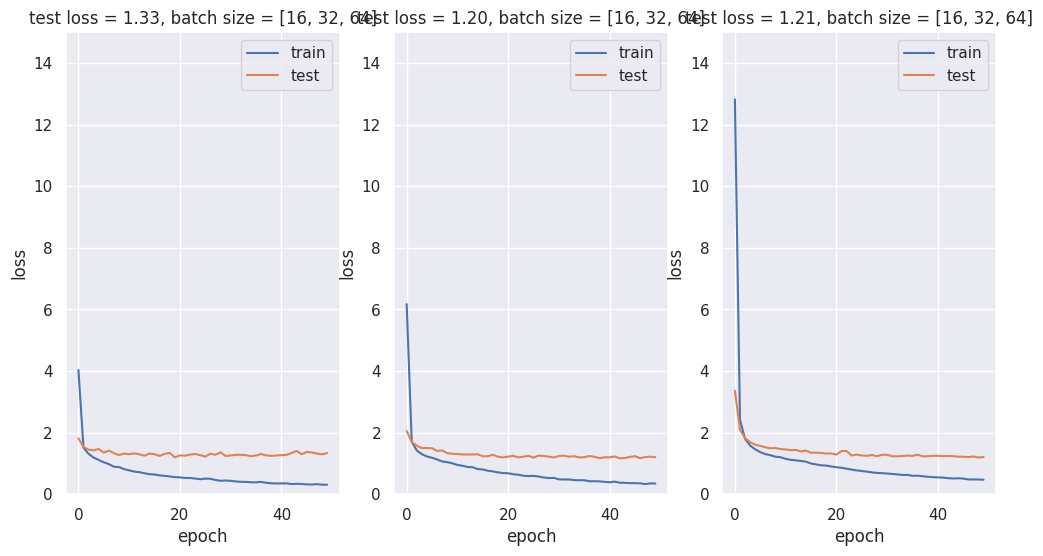

In [19]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((X_train))).astype(float),
        y_train.values,
        batch_size=batch,
        validation_data=(np.array(list((X_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch_sizes}"
    )
plt.show()

From the loss plots above, a batch of size 16 seems to give the best performance.

#### 2.1.2.3. Epochs analysis

In [20]:
# Neural network parameters
batch_sizes = 16
nb_epoch = [50,100,150]
layer1_size = 64
layer2_size = 32

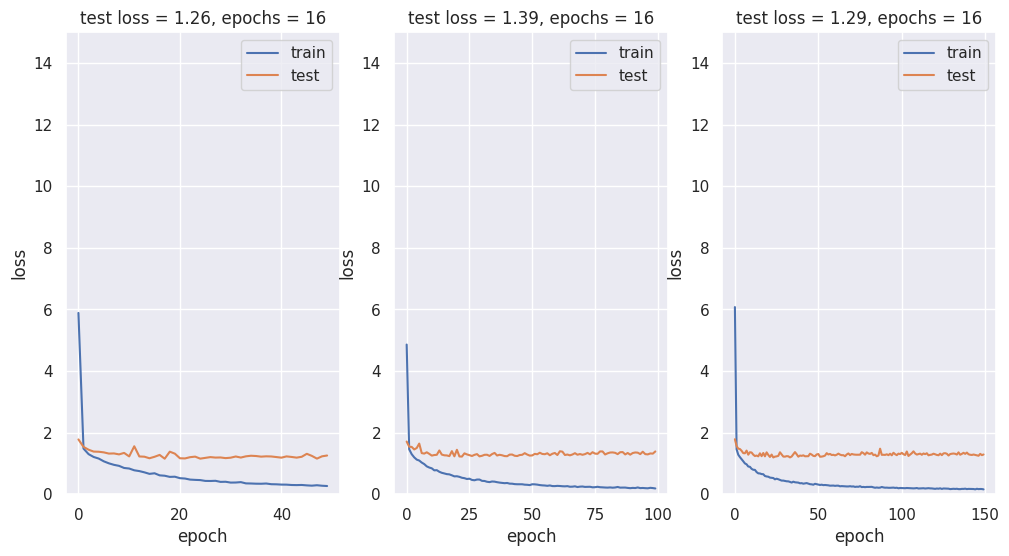

In [21]:
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)

for index, size in enumerate(nb_epoch):
    fig.add_subplot(1, len(nb_epoch), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((X_train))).astype(float),
        y_train.values,
        batch_size=batch_sizes,
        validation_data=(np.array(list((X_test))).astype(float), y_test.values),
        verbose=0,
        epochs=size,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][size-1]:.2f}, " f"epochs = {batch_sizes}"
    )
plt.show()

#### 2.1.2.4. Nodes Analysis

In [ ]:
# Neural network parameters
batch_sizes = 16
nb_epoch = 50
layer1_size = [32, 64, 128]
#layer2_size = 

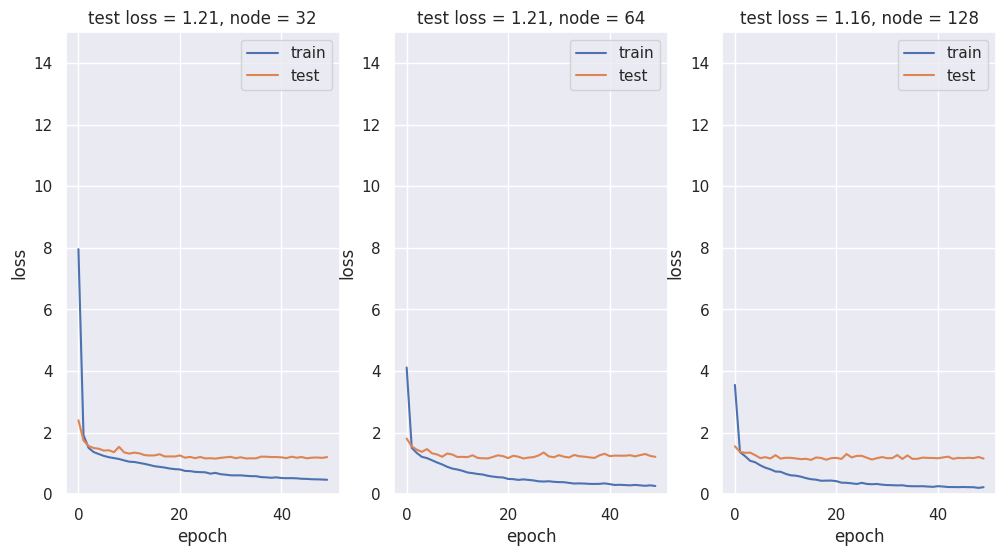

In [ ]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, size in enumerate(layer1_size):
    fig.add_subplot(1, len(layer1_size), index + 1)
    model = neural_network_model(size, size/2)

    # Fit model on x_train, y_train data
    history = model.fit(
        np.array(list((X_train))).astype(float),
        y_train.values,
        batch_size=batch_sizes,
        validation_data=(np.array(list((X_test))).astype(float), y_test.values),
        verbose=0,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"node = {size}"
    )
plt.show()

### 2.1.3. Evaluation & prediction on test set

The [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method is used to check the performance of our model. It reports the **loss** (which is the mse in our case) as well as evaluation metrics (which are the **mse** and **mae**).

In [22]:
# Evalute the model
print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((X_test))), y_test.values, verbose=0)
print(f" loss: {scores[0]:.2f}")
print(f" mse (same as loss): {scores[1]:.2f}")
print(f" mae: {scores[2]:.2f}")

Evaluate the model on the test data
 loss: 1.29
 mse (same as loss): 1.29
 mae: 0.84


The mean absolute error on the test set is as below $1.0$ which given the range of pIC50 values is pretty low.

We now predict the pIC50 values on the test data. 

In [23]:
# Predict pIC50 values on x_test data
y_pred = model.predict(np.array(list((X_test))))

# Print 5 first pIC50 predicted values
first_5_prediction = [print(f"{value[0]:.2f}") for value in y_pred[0:5]]

25/25 [==============================] - 0s 2ms/step
4.91
7.08
8.27
8.37
9.18


### 2.1.4. Visualization

To visualize the predictions, we plot the predicted vs. the true pIC50 values on the test set. 

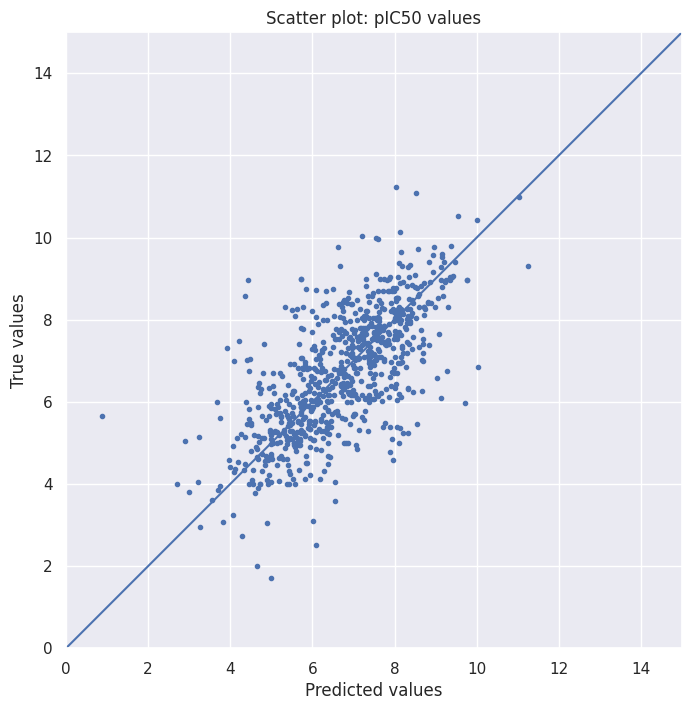

In [24]:
# Scatter plot
limits = 0, 15
fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(y_pred, y_test, marker=".")
lin = np.linspace(*limits, 100)
ax.plot(lin, lin)
ax.set_aspect("equal", adjustable="box")
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
ax.set_title("Scatter plot: pIC50 values")
ax.set_xlim(limits)
ax.set_ylim(limits)
plt.show()

## 2.2. Build from scratch

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [26]:
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole

In [27]:
trainsdf = Chem.SDMolSupplier("solubility.train.sdf")
testsdf = Chem.SDMolSupplier("solubility.test.sdf")
train_mols = [mol for mol in trainsdf if mol != None]
test_mols = [mol for mol in testsdf if mol != None]
print(len(train_mols), len(test_mols))

sol_class = {"(A) low":0, "(B) medium":1, "(C) high": 2}

1025 257


In [28]:
# 2048 bit vector
def mol2arr(mol):
  arr = np.zeros((1,))
  fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2)
  DataStructs.ConvertToNumpyArray(fp, arr)
  return arr

In [30]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.layers import Activation, Dense, Dropout, Input
from keras.utils import np_utils


X_train = np.array([mol2arr(mol) for mol in train_mols])
trainY = [sol_class[mol.GetProp("SOL_classification")] for mol in train_mols]
y_train = np_utils.to_categorical(trainY)

X_test = np.array([mol2arr(mol) for mol in test_mols])
testY = [sol_class[mol.GetProp("SOL_classification")] for mol in test_mols]
y_test = np_utils.to_categorical(testY)


### 2.2.1 Define model

In [31]:
inputs = Input(shape=(2048,), name='input')
x = Dense(100, activation='relu', name='Layer1')(inputs)
x = Dense(20, activation='relu', name='Layer2')(x)
x = Dense(2, activation='relu', name='Layer3')(x)
predictions = Dense(3, activation='softmax', name='output')(x)

model = Model(inputs=inputs, outputs = predictions)
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.01),
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
model.summary()


model_int = Model(inputs=inputs, outputs=model.get_layer(name='Layer3').output)
model_int.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 2048)]            0         
                                                                 
 Layer1 (Dense)              (None, 100)               204900    
                                                                 
 Layer2 (Dense)              (None, 20)                2020      
                                                                 
 Layer3 (Dense)              (None, 2)                 42        
                                                                 
 output (Dense)              (None, 3)                 9         
                                                                 
Total params: 206,971
Trainable params: 206,971
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
______________________________________

In [32]:
epochs = 50
hist = model.fit(np.array(X_train), y_train, batch_size=32, epochs=epochs)

Epoch 1/50
33/33 [==============================] - 3s 6ms/step - loss: 0.9222 - accuracy: 0.4722
Epoch 2/50
33/33 [==============================] - 0s 5ms/step - loss: 0.7153 - accuracy: 0.6644
Epoch 3/50
33/33 [==============================] - 0s 4ms/step - loss: 0.6020 - accuracy: 0.7620
Epoch 4/50
33/33 [==============================] - 0s 4ms/step - loss: 0.4862 - accuracy: 0.8449
Epoch 5/50
33/33 [==============================] - 0s 4ms/step - loss: 0.4096 - accuracy: 0.8878
Epoch 6/50
33/33 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.9190
Epoch 7/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.9356
Epoch 8/50
33/33 [==============================] - 0s 4ms/step - loss: 0.2320 - accuracy: 0.9493
Epoch 9/50
33/33 [==============================] - 0s 3ms/step - loss: 0.2066 - accuracy: 0.9541
Epoch 10/50
33/33 [==============================] - 0s 4ms/step - loss: 0.1881 - accuracy: 0.9532
Epoch 11/50
33/33 [

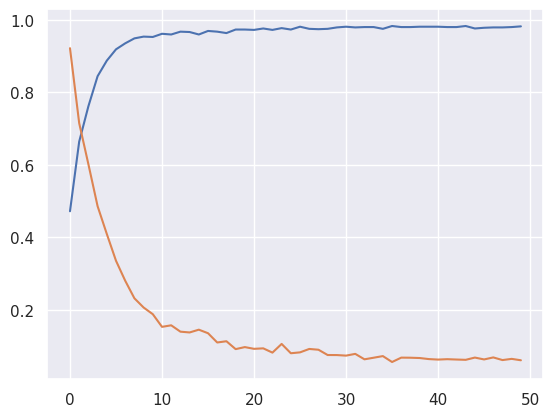

In [33]:
plt.plot(range(epochs), hist.history['accuracy'])
plt.plot(range(epochs), hist.history['loss'])

### 2.2.2. Evaluation

In [34]:
from sklearn.metrics import classification_report
predY = model.predict(X_test)
predY = [np.argmax(y) for y in predY]
Y = [np.argmax(y) for y in y_test]
print(classification_report(Y, predY))

9/9 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       102
           1       0.75      0.64      0.69       115
           2       0.69      0.82      0.75        40

    accuracy                           0.74       257
   macro avg       0.73      0.76      0.74       257
weighted avg       0.74      0.74      0.74       257

